# Preprocessing for FER2013 Dataset
This notebook preprocesses the `fer2013.csv` file, specifically for use with ResNet models (might be the same or different for other models, not sure yet). 

The preprocessing involves reshaping images to 224x224 pixels.

We may need to change these notebooks to .py files at the end of our project, Im not sure yet and have no idea how those work either


In [9]:
import os
import pandas as pd 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import h5py

In [10]:
df = pd.read_csv("../data/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## Preprocessing Function
The `preprocess_pixels` function converts pixel strings in the DataFrame to 224x224 NumPy arrays.


In [11]:
def preprocess_pixels(data: pd.DataFrame) -> pd.DataFrame:
    """
    Converts the 'pixels' column in the DataFrame from strings to 48x48 NumPy arrays
    and normalizes the pixel values to be between 0 and 1.
    
    Parameters:
    - data: pd.DataFrame containing a 'pixels' column with pixel data in string format.
    
    Returns:
    - A new DataFrame with the 'pixels' column containing normalized NumPy arrays.
    """
    
    def process_pixel(pixel):
        image_array = np.fromstring(pixel, sep=' ', dtype=np.float32).reshape(48, 48)
        normalized_image_array = image_array / 255.0
        return normalized_image_array
    
    new_data = data.copy()
    new_data['pixels'] = new_data['pixels'].apply(process_pixel)
    return new_data

In [12]:
def visualize_transformations(original_df, processed_df, n_images=5):
    """
    Visualizes the transformations by showing images before and after processing.
    """
    fig, axes = plt.subplots(nrows=n_images, ncols=2, figsize=(10, n_images * 2))

    for i in range(n_images):
        # Original image (assuming it's in string format)
        orig_pixels = original_df.iloc[i]['pixels']
        orig_pixels = np.fromstring(orig_pixels, sep=' ', dtype=int).reshape(48, 48)
        axes[i, 0].imshow(orig_pixels, cmap='gray')
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')

        # Processed image (assuming it's already a numpy array)
        proc_pixels = processed_df.iloc[i]['pixels']
        if proc_pixels.ndim == 2:  # If the image is 2D (grayscale)
            axes[i, 1].imshow(proc_pixels, cmap='gray')
        else:  # If the image is 3D (RGB)
            axes[i, 1].imshow(proc_pixels)
        axes[i, 1].set_title('Processed Image')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

In [13]:
# Preprocess and split the data
new_df = preprocess_pixels(df)
new_df

,emotion,pixels,Usage
0,0,"[[0.27450982, 0.3137255, 0.32156864, 0.2823529...",Training
1,0,"[[0.5921569, 0.5882353, 0.5764706, 0.60784316,...",Training
2,2,"[[0.90588236, 0.83137256, 0.6117647, 0.6431373...",Training
3,4,"[[0.09411765, 0.1254902, 0.14117648, 0.1176470...",Training
4,6,"[[0.015686275, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",Training
...,...,...,...
35882,6,"[[0.19607843, 0.14117648, 0.06666667, 0.086274...",PrivateTest
35883,3,"[[0.69803923, 0.68235296, 0.6745098, 0.6784314...",PrivateTest
35884,0,"[[0.06666667, 0.06666667, 0.0627451, 0.0901960...",PrivateTest
35885,3,"[[0.11764706, 0.10980392, 0.10980392, 0.113725...",PrivateTest


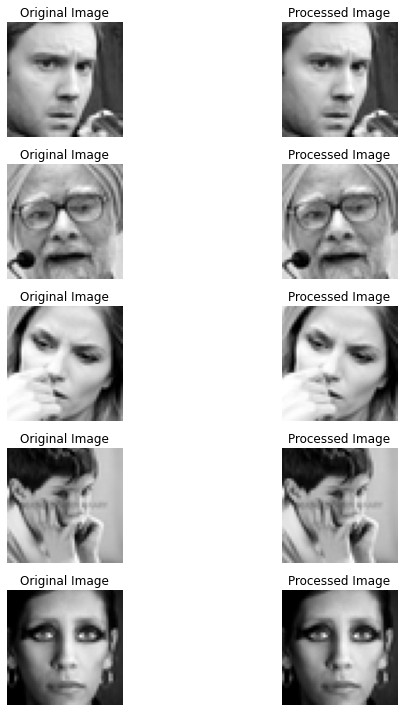

In [14]:
visualize_transformations(df, new_df, n_images=5)

In [15]:
hdf5_file = "../data/fer_2013_processed.h5"
image_data = np.stack(new_df["pixels"].values)
label_data = np.array(new_df["emotion"])

with h5py.File(hdf5_file, "w") as h5f:
    h5f.create_dataset("images", data=image_data)
    h5f.create_dataset("labels", data=label_data)